In [15]:
#Exportacion de las librerias
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#librerias para implementar modelos de ciencia de datos
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder



#lectura de datos en python y lo cargamos en la variable datos
datos = pd.read_csv('C:/Users/usuario/ANALISIS DE DATOS/Titanic-Dataset.csv')

#realizamos la lectura de los datos para el analisis exploratorio
datos.head(300)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S


In [2]:
#Descripcion de los datos
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y atipicos')

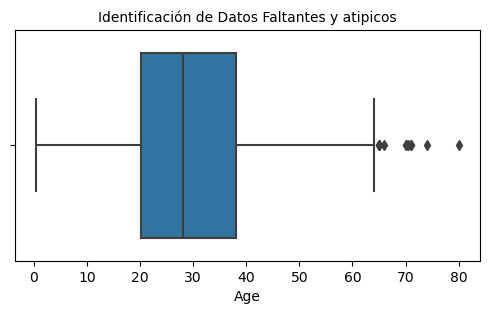

In [3]:
#idetificacion de datos faltantes y atipicos

plt.figure(figsize=(6,3)) #tamaño de figura
sns.boxplot(x=datos['Age'])
plt.title('Identificación de Datos Faltantes y atipicos', fontsize=10) # titulo de la grafica


Text(0.5, 1.0, 'Identificación de Datos Faltantes y atipicos')

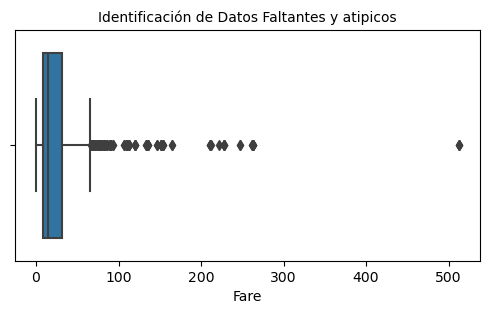

In [4]:
#idetificacion de datos faltantes y atipicos

plt.figure(figsize=(6,3)) #tamaño de figura
sns.boxplot(x=datos['Fare'])
plt.title('Identificación de Datos Faltantes y atipicos', fontsize=10) # titulo de la grafica


In [10]:
# Revision de datos faltantes
print("Cantidad de registros con cero en PassengerId ", datos['PassengerId'].isin([0]).sum())
print("Cantidad de registros con cero en Pclass", datos['Pclass'].isin([0]).sum())
print("Cantidad de registros con cero en Name", datos['Name'].isin([0]).sum())
print("Cantidad de registros con cero en Sex", datos['Sex'].isin([0]).sum())
print("Cantidad de registros con cero en 'Ticket", datos['Ticket'].isin([0]).sum())
print("Cantidad de registros con cero en Fare", datos['Fare'].isin([0]).sum())
print("Cantidad de registros con cero en Cabin", datos['Cabin'].isin([0]).sum())
print("Cantidad de registros con cero en Embarked", datos['Embarked'].isin([0]).sum())



Cantidad de registros con cero en PassengerId  0
Cantidad de registros con cero en Pclass 0
Cantidad de registros con cero en Name 0
Cantidad de registros con cero en Sex 0
Cantidad de registros con cero en 'Ticket 0
Cantidad de registros con cero en Fare 15
Cantidad de registros con cero en Cabin 0
Cantidad de registros con cero en Embarked 0


In [ ]:
# No se identifican datos faltantes en el actual dataset

In [14]:
#Revisión del tipo de datos y datos faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# variable de precios de los carros
datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
# se crean variables X y Y para almacenar la información del entrenamiento

X = datos.drop('Survived',axis=1) 
Y = datos['Survived'] 

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

#impresion de resultados X_train
print (X_train)

     PassengerId  Pclass                                             Name  \
105          106       3                            Mionoff, Mr. Stoytcho   
68            69       3                  Andersson, Miss. Erna Alexandra   
253          254       3                         Lobb, Mr. William Arthur   
320          321       3                               Dennis, Mr. Samuel   
706          707       2                    Kelly, Mrs. Florence "Fannie"   
..           ...     ...                                              ...   
835          836       1                      Compton, Miss. Sara Rebecca   
192          193       3  Andersen-Jensen, Miss. Carla Christine Nielsine   
629          630       3                         O'Connell, Mr. Patrick D   
559          560       3     de Messemaeker, Mrs. Guillaume Joseph (Emma)   
684          685       2                Brown, Mr. Thomas William Solomon   

        Sex   Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
105   

In [18]:
#impresion de resultados Y_train
print (Y_train)

105    0
68     1
253    0
320    0
706    1
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 668, dtype: int64


In [20]:


encoder = OneHotEncoder()

# Combina los conjuntos de datos de entrenamiento y prueba
X_combined = pd.concat([X_train, X_test], axis=0)

# Ajusta y transforma las características categóricas en el conjunto combinado
X_combined_encoded = encoder.fit_transform(X_combined)

# Divide el conjunto combinado nuevamente en conjuntos de entrenamiento y prueba
X_train_encoded = X_combined_encoded[:len(X_train)]
X_test_encoded = X_combined_encoded[len(X_train):]

# Construir el modelo de regresión lineal
regresion = LinearRegression()
regresion.fit(X_train_encoded, Y_train)

# Realiza predicciones en el conjunto de prueba
prediccion = regresion.predict(X_test_encoded)

#impresion de resultados
print(Y_test)


495    0
648    0
278    0
31     1
255    1
      ..
167    0
306    1
379    0
742    1
10     1
Name: Survived, Length: 223, dtype: int64


In [21]:
#impresion de resultados de prediccion
print(prediccion)

[-2.36529335e-01  4.94152658e-02 -1.33892464e-01  9.81855338e-01
  1.06854836e+00  5.02427176e-01  8.80926706e-01  1.03740622e+00
  3.85496284e-01  5.92966611e-01  3.02753791e-01  7.65267271e-01
  1.99737199e-01  6.49610109e-01  9.53848825e-01  5.97833124e-01
 -3.23497146e-03  6.73847503e-01  1.63854698e-01  2.49796463e-01
  7.53972104e-02  4.94755140e-01  1.59606569e-01  3.80924553e-01
  6.12607818e-01  1.14485638e+00  1.67066664e-01  6.52738448e-01
  7.75405578e-01  3.71019201e-01  4.20962140e-02  6.01431682e-01
  1.22402448e-01  5.28405372e-01  2.36866837e-01  7.65696400e-01
 -1.40883549e-02  8.81042295e-02  1.29264167e-01  1.86172752e-01
  4.06789865e-01  7.55059916e-02  5.75294027e-02 -5.73854961e-02
  9.41293754e-01 -1.71046019e-03 -1.71046019e-03  8.38518484e-01
  2.09300717e-01  5.40622129e-01  4.07743580e-01  4.49346622e-01
  1.15546048e+00  4.77642883e-02  3.53466801e-01  5.32651516e-03
  4.72162520e-01  1.90977534e-01 -2.22887840e-01  3.19230669e-01
  1.84904588e-01  2.42390

In [22]:
#Desempeño del modelo de regresion
# Calcula el error cuadrático medio
mse = mean_squared_error(Y_test, prediccion)
print("Error cuadrático medio:", mse)

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(Y_test, prediccion)
print("Coeficiente de determinación (R cuadrado):", r2)


Error cuadrático medio: 0.1303678983203073
Coeficiente de determinación (R cuadrado): 0.4447528934934427


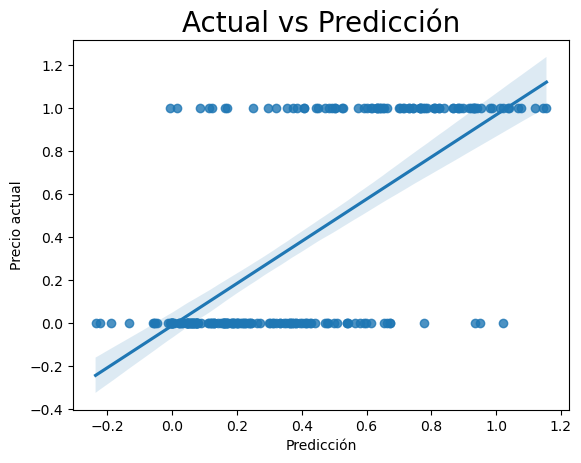

In [23]:
#grafica de regresion lineal
sns.regplot(x=prediccion, y=Y_test)
plt.title("Actual vs Predicción", fontsize=20)
plt.xlabel("Predicción")
plt.ylabel('Precio actual')
plt.show()